In [39]:
import foundational_model.model
import foundational_model.data as data
import matplotlib.pyplot as plt

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
sample_data = data.PretrainSingleChannel_emg2qwerty("/home/lawrence/emg2qwerty/data/2020-08-17-1597700134-keystrokes-09456349.hdf5",
                    window_length = 5000,
                    padding = [0,0],  # 900ms past context, 100ms future context
                    stride = 5000)

In [85]:
len(sample_data)

8352

In [86]:
for i in range(32):
    sample_data[i]

torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])
torch.Size([5000, 2, 16])


In [87]:
model = foundational_model.model.ViTMAEForEMG_Pretraining(
    foundational_model.model.ViTMAEForEMGConfig(
        sequence_len = sample_data[0]["emg"].shape[-1],
        n_fft = 128,
        hop_length = 32,)
)

torch.Size([5000, 2, 16])
5000
(65, 157)
160
['spectral_masked_only']


In [88]:
sample_data[400]["emg"].shape[-1]

torch.Size([5000, 2, 16])


5000

In [89]:
sample_data[600]["emg"].shape

torch.Size([5000, 2, 16])


torch.Size([5000])

torch.Size([5000, 2, 16])
torch.Size([1, 1, 160, 160])


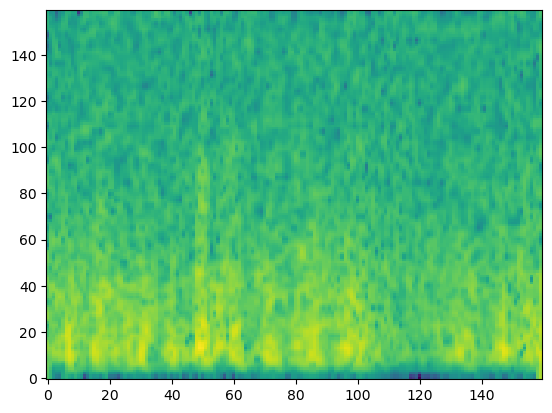

In [91]:
sample_spec,phases = model.forward_transform(sample_data[900]["emg"].unsqueeze(0))
print(sample_spec.shape)

plt.imshow(sample_spec[0].detach().squeeze(0).squeeze(0).cpu().numpy(), aspect="auto",
           origin="lower", interpolation="none")

torch.Size([1, 1, 65, 157])
torch.Size([1, 65, 157])
torch.Size([1, 65, 157])
torch.Size([5000, 2, 16])


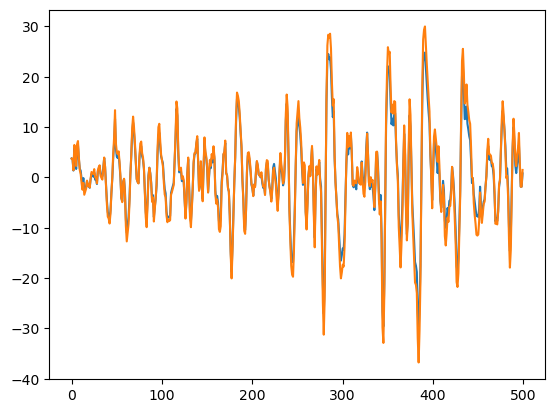

In [83]:
# print(sample_spec.shape)
# print(phases.shape)
reconstructed = model.inverse_transform(sample_spec, phases)
# print(reconstructed.shape)
plt.plot(reconstructed[0][:500])
plt.plot(sample_data[500]["emg"].squeeze(0).cpu().numpy()[:500])

In [ ]:
import transformers.trainer as trainer


class CustomTrainer(trainer):

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.batch_idx = 0
        self.epoch_idx = 0

    #custom compute loss function

    def compute_loss(self, model, inputs, return_outputs=False):


        emg = inputs["emg"]

        output = model.forward(emg)


        loss = output.loss

        #log the loss, 



